In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from numpy import random



ModuleNotFoundError: No module named 'tensorflow'

In [20]:
mnist= tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
train_images = train_images/255 

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images/255

# for i in range(6):
#   plt.subplot(2,3,i+1)
#   plt.imshow(train_images[i],cmap='gray')
# plt.show()

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)


(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


 
 

---


  **CNN Model**







In [34]:
model=tf.keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10))

model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1600)              0         
                                                                 
 dense_18 (Dense)            (None, 128)             

In [24]:
from keras import optimizers
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
epochs=5
batchSize=64

model.compile(loss=loss,optimizer=optim,metrics=metrics)
model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs,shuffle=True)



Epoch 1/3
938/938 [==============================] - 61s 64ms/step - loss: 0.1258 - accuracy: 0.9619
Epoch 2/3
938/938 [==============================] - 57s 60ms/step - loss: 0.0568 - accuracy: 0.9833
Epoch 3/3
938/938 [==============================] - 56s 60ms/step - loss: 0.0388 - accuracy: 0.9879


In [26]:
model.evaluate(test_images,test_labels,batch_size=batchSize)

157/157 [==============================] - 3s 17ms/step - loss: 0.0305 - accuracy: 0.9897


[0.030475396662950516, 0.9897000193595886]

Prediction :  7


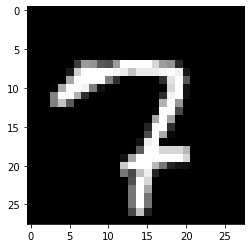

In [32]:

#prediction time
pred_model= tf.keras.models.Sequential();
pred_model.add(model)
pred_model.add(layers.Softmax())

cnt =random.randint(100)

predictions=pred_model(test_images)
pred0=predictions[cnt]
label0=np.argmax(pred0) #agrmax finds max in the array passed .here aray is pred0

# print(pred0)
plt.imshow(test_images[cnt],cmap='gray')
print("Prediction : ",label0)
